# 제 1 유형

> 데이터
* https://www.kaggle.com/mirichoi0218/insurance/code
* 의료비용 예측문제

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/Datarepo/main/MedicalCost/train.csv")

## Q1.
> 흡연자와 비흡연자 각각 charges의 상위 10% 그룹의 평균의 차이는?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.6+ KB


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,39.330,0,no,northeast,14901.51670
1,47,female,27.830,0,yes,southeast,23065.42070
2,52,female,33.300,2,no,southwest,10806.83900
3,33,female,22.135,1,no,northeast,5354.07465
4,30,male,31.400,1,no,southwest,3659.34600


In [4]:
smokers = df[df["smoker"] == "yes"]
non_smokers = df[df["smoker"] == "no"]

In [10]:
answer = smokers[smokers["charges"] >= smokers["charges"].quantile(0.9)]["charges"].mean() - non_smokers[non_smokers["charges"] >= non_smokers["charges"].quantile(0.9)]["charges"].mean()
print(answer)

29297.954548156144


# 제 2 유형

> 데이터
* https://www.kaggle.com/mirichoi0218/insurance/code
* 의료비용 예측문제
* 평가지표: r2 score

In [11]:
import pandas as pd

train_set = pd.read_csv("https://raw.githubusercontent.com/Datamanim/Datarepo/main/MedicalCost/train.csv")
test_set = pd.read_csv("https://raw.githubusercontent.com/Datamanim/Datarepo/main/MedicalCost/test.csv")

In [12]:
train_set.head()

,age,sex,bmi,children,smoker,region,charges
0,64,female,39.330,0,no,northeast,14901.51670
1,47,female,27.830,0,yes,southeast,23065.42070
2,52,female,33.300,2,no,southwest,10806.83900
3,33,female,22.135,1,no,northeast,5354.07465
4,30,male,31.400,1,no,southwest,3659.34600


In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.6+ KB


In [14]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       268 non-null    int64  
 1   sex       268 non-null    object 
 2   bmi       268 non-null    float64
 3   children  268 non-null    int64  
 4   smoker    268 non-null    object 
 5   region    268 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.7+ KB


In [17]:
train_set.corr().style.background_gradient()

<ipython-input-17-aa3e361e7982>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_set.corr().style.background_gradient()


,age,bmi,children,charges
age,1.000000,0.119744,0.050033,0.306557
bmi,0.119744,1.000000,0.018004,0.199802
children,0.050033,0.018004,1.000000,0.081234
charges,0.306557,0.199802,0.081234,1.000000


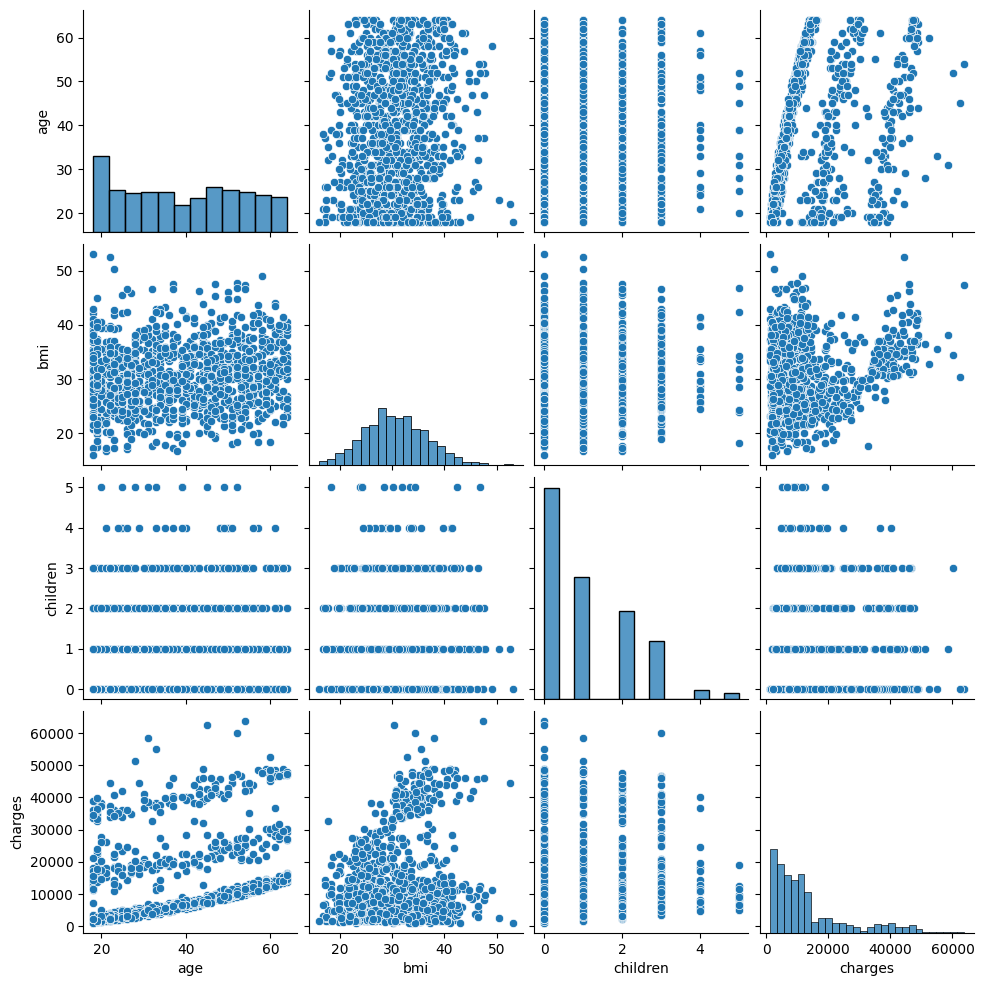

In [18]:
import seaborn as sns

sns.pairplot(train_set)

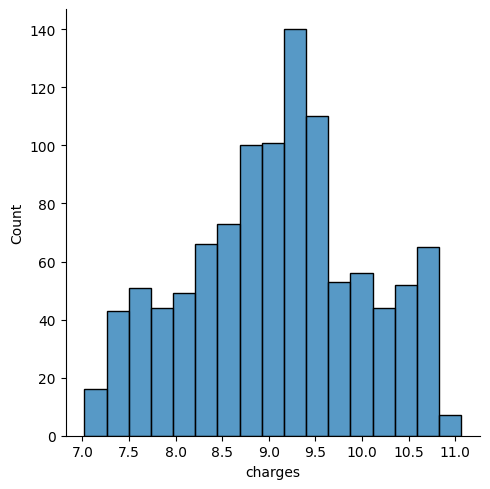

In [19]:
import numpy as np
sns.displot(np.log(train_set["charges"]))

## 전처리함수 작성

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def my_preprocess(org_df, target="train", encoders=None, scaler=None):
    df = org_df.copy()
    df.reset_index(drop=True, inplace=True)
    if target == "train":
        en1 = OneHotEncoder(sparse_output=False)
        en2 = OneHotEncoder(sparse_output=False)
        en3 = OneHotEncoder(sparse_output=False)
        sc1 = StandardScaler()
        df = pd.concat([df.drop(columns="sex"), pd.DataFrame(en1.fit_transform(df[["sex"]]), columns=[f"sex_{col}" for col in en1.categories_[0]])], axis=1)
        df = pd.concat([df.drop(columns="smoker"), pd.DataFrame(en2.fit_transform(df[["smoker"]]), columns=[f"smoker_{col}" for col in en2.categories_[0]])], axis=1)
        df = pd.concat([df.drop(columns="region"), pd.DataFrame(en3.fit_transform(df[["region"]]), columns=[f"region_{col}" for col in en3.categories_[0]])], axis=1)
        df = sc1.fit_transform(df)
        return df, [en1, en2, en3], sc1
    elif target == "test":
        en1 = encoders[0]
        en2 = encoders[1]
        en3 = encoders[2]
        sc1 = scaler
        df = pd.concat([df.drop(columns="sex"), pd.DataFrame(en1.transform(df[["sex"]]), columns=[f"sex_{col}" for col in en1.categories_[0]])], axis=1)
        df = pd.concat([df.drop(columns="smoker"), pd.DataFrame(en2.transform(df[["smoker"]]), columns=[f"smoker_{col}" for col in en2.categories_[0]])], axis=1)
        df = pd.concat([df.drop(columns="region"), pd.DataFrame(en3.transform(df[["region"]]), columns=[f"region_{col}" for col in en3.categories_[0]])], axis=1)
        df = sc1.transform(df)
        return df

## 종속변수, 독립변수 분할 및 로그 변환

In [58]:
X = train_set.drop(columns="charges")
y = train_set["charges"]
log_y = np.log(y)

## 훈련, 검증 분할(K fold)

In [59]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=9)
X_trains, X_vals, y_trains, y_vals = [[], [], [], []]
for train_idx, test_idx in kf.split(X, log_y):
    X_trains.append(X.iloc[train_idx])
    X_vals.append(X.iloc[test_idx])
    y_trains.append(log_y.iloc[train_idx])
    y_vals.append(log_y.iloc[test_idx])

## 전처리 시행

In [60]:
X_trains_proc = []
X_vals_proc = []
for i in range(5):
    train_temp, encoders, scaler = my_preprocess(X_trains[i], target="train")
    X_trains_proc.append(train_temp)
    X_vals_proc.append(my_preprocess(X_vals[i], target="test", encoders=encoders, scaler=scaler))

## 분석

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import tensorflow as tf

from sklearn.metrics import r2_score, mean_squared_error

### 회귀분석

In [63]:
scores_lr = []
mse_lr = []
for i in range(5):
    model_lr = LinearRegression()
    model_lr.fit(X_trains_proc[i], y_trains[i])
    pred = model_lr.predict(X_vals_proc[i])
    scores_lr.append(r2_score(y_vals[i], pred))
    mse_lr.append(mean_squared_error(y_vals[i], pred))

print(sum(scores_lr) / 5)
print(sum(mse_lr) / 5)

0.756206331809518
0.21020215176418952


### 랜덤 포레스트

In [66]:
for k in range(2, 21):
    scores_rf = []
    mse_rf = []
    for i in range(5):
        model_rf = RandomForestRegressor(max_depth=k, random_state=9)
        model_rf.fit(X_trains_proc[i], y_trains[i])
        pred = model_rf.predict(X_vals_proc[i])
        scores_rf.append(r2_score(y_vals[i], pred))
        mse_rf.append(mean_squared_error(y_vals[i], pred))

    print(k, sum(scores_rf) / 5)
    print(k, sum(mse_rf) / 5, "\n")

2 0.7310012222480857
2 0.23200530848652562 

3 0.804400111799372
3 0.169629804779993 

4 0.8186165419859357
4 0.15747699315137656 

5 0.8228612473552366
5 0.15381508968446006 

6 0.8218581414559466
6 0.15481065771186397 

7 0.8173913933729959
7 0.15863675440198172 

8 0.8104450420950847
8 0.16443042048303916 

9 0.8038566540128402
9 0.17008140270784827 

10 0.8011902861893947
10 0.1722557592665656 

11 0.8006018330383142
11 0.17265646597135204 

12 0.798622389181901
12 0.17436067723969842 

13 0.7990590105941932
13 0.17398813848019476 

14 0.7989588408177213
14 0.17404402732607044 

15 0.7990080718938227
15 0.17398266817655253 

16 0.7982573083628037
16 0.17463483638307362 

17 0.7983119229452591
17 0.1745640281583083 

18 0.7988847214688883
18 0.17410205962116296 

19 0.7988239994723887
19 0.17414742261588576 

20 0.7988985061266511
20 0.17409157193531133 



In [67]:
scores_rf = []
mse_rf = []
for i in range(5):
    model_rf = RandomForestRegressor(max_depth=5, random_state=9)
    model_rf.fit(X_trains_proc[i], y_trains[i])
    pred = model_rf.predict(X_vals_proc[i])
    scores_rf.append(r2_score(y_vals[i], pred))
    mse_rf.append(mean_squared_error(y_vals[i], pred))

print(sum(scores_rf) / 5)
print(sum(mse_rf) / 5, "\n")

0.8228612473552366
0.15381508968446006 



### AdaBoost

In [70]:
scores_ab = []
mse_ab = []
for i in range(5):
    model_ab = AdaBoostRegressor(learning_rate=0.1, random_state=9)
    model_ab.fit(X_trains_proc[i], y_trains[i])
    pred = model_ab.predict(X_vals_proc[i])
    scores_ab.append(r2_score(y_vals[i], pred))
    mse_ab.append(mean_squared_error(y_vals[i], pred))

print(sum(scores_ab) / 5)
print(sum(mse_ab) / 5, "\n")

0.7738955420051641
0.1956111556162646 



### XGBoost

In [73]:
for k in range(2, 16):
    scores_xgb = []
    mse_xgb = []
    for i in range(5):
        model_xgb = XGBRegressor(max_depth=k, random_state=9)
        model_xgb.fit(X_trains_proc[i], y_trains[i])
        pred = model_xgb.predict(X_vals_proc[i])
        scores_xgb.append(r2_score(y_vals[i], pred))
        mse_xgb.append(mean_squared_error(y_vals[i], pred))
    print(k)
    print(sum(scores_xgb) / 5)
    print(sum(mse_xgb) / 5, "\n")

2
0.8124336086433057
0.1627412856079337 

3
0.800529482873166
0.17288346200252624 

4
0.7824908357136893
0.18791909870321993 

5
0.7606569579440278
0.20584973146454785 

6
0.7704866643480844
0.1980994190953207 

7
0.7641507604874769
0.2035684561625132 

8
0.755938100701799
0.21031583590647246 

9
0.7575807201035067
0.20898419078244804 

10
0.7738976704302154
0.19498336500062965 

11
0.7661607979021744
0.20131568364964308 

12
0.7583702437484283
0.20794360793010247 

13
0.7694254833937058
0.19793215071219333 

14
0.7582381953780628
0.20795307734742746 

15
0.7587281674337973
0.20815261370110524 



In [74]:
scores_xgb = []
mse_xgb = []
for i in range(5):
    model_xgb = XGBRegressor(max_depth=2, random_state=9)
    model_xgb.fit(X_trains_proc[i], y_trains[i])
    pred = model_xgb.predict(X_vals_proc[i])
    scores_xgb.append(r2_score(y_vals[i], pred))
    mse_xgb.append(mean_squared_error(y_vals[i], pred))
    
print(sum(scores_xgb) / 5)
print(sum(mse_xgb) / 5, "\n")

0.8124336086433057
0.1627412856079337 



### ANN

In [76]:
def bulid_ann():
    ann = tf.keras.Sequential()
    ann.add(tf.keras.layers.Dense(64, activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(64, activation="relu"))
    ann.add(tf.keras.layers.Dropout(0.2))
    ann.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.linear))
    ann.compile(optimizer="adam",
                loss=tf.keras.losses.mean_squared_error,
                metrics=[tf.keras.metrics.mean_absolute_error],
                )
    return ann

In [78]:
scores_ann = []
mse_ann = []
for i in range(5):
    model_ann = bulid_ann()
    model_ann.fit(X_trains_proc[i],
                  y_trains[i],
                  batch_size=10,
                  epochs=200,
                  validation_split=0.2,
                  callbacks=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
                  )
    pred = model_ann.predict(X_vals_proc[i])
    scores_ann.append(r2_score(y_vals[i], pred))
    mse_ann.append(mean_squared_error(y_vals[i], pred))

print(sum(scores_ann) / 5)
print(sum(mse_ann) / 5)

Epoch 1/200
69/69 [==============================] - 1s 4ms/step - loss: 42.1657 - mean_absolute_error: 6.0175 - val_loss: 4.6379 - val_mean_absolute_error: 1.8130
Epoch 2/200
69/69 [==============================] - 0s 2ms/step - loss: 3.3929 - mean_absolute_error: 1.4732 - val_loss: 1.1578 - val_mean_absolute_error: 0.8591
Epoch 3/200
69/69 [==============================] - 0s 2ms/step - loss: 2.6338 - mean_absolute_error: 1.3054 - val_loss: 0.7703 - val_mean_absolute_error: 0.6778
Epoch 4/200
69/69 [==============================] - 0s 2ms/step - loss: 2.4529 - mean_absolute_error: 1.2304 - val_loss: 0.6791 - val_mean_absolute_error: 0.6244
Epoch 5/200
69/69 [==============================] - 0s 2ms/step - loss: 2.2872 - mean_absolute_error: 1.2046 - val_loss: 0.5856 - val_mean_absolute_error: 0.5698
Epoch 6/200
69/69 [==============================] - 0s 2ms/step - loss: 2.1911 - mean_absolute_error: 1.1849 - val_loss: 0.5260 - val_mean_absolute_error: 0.5324
Epoch 7/200
69/69 [==

## 랜덤 포레스트의 성능이 가장 좋음

In [80]:
X_proc, encoders, scaler = my_preprocess(X, target="train")
test_proc = my_preprocess(test_set, target="test", encoders=encoders, scaler=scaler)

model_rf = RandomForestRegressor(max_depth=5, random_state=9)
model_rf.fit(X_proc, log_y)
train_pred = model_rf.predict(X_proc)
r2_score(log_y, train_pred)

0.8539097119488759

In [83]:
r2_score(y, np.exp(train_pred))

0.8784166075837787

In [85]:
test_pred = model_rf.predict(test_proc)
test_pred = np.exp(test_pred)
pd.DataFrame(test_pred).to_csv("submission_pred.csv")